In [22]:
#Isabella Rodrigues de Oliveira RA: 10357696

import pandas as pd #biblioteca para trabalhar dados tabulares
import numpy as np #biblioteca para manipular dados em formato de arranjos e realizar operaçoes numericas eficientemente
import matplotlib.pyplot as plt #biblioteca para criacao de graficos
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
df = pd.read_csv("/content/drive/MyDrive/Mackenzie_2025_2Sem/AI/Projeto_Parte1/diamonds.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Em ciencia de dados, geralmente, assumimos que os dados contem variaveis aleatorias e independentemente e identicamente distribuidas (IID).

In [4]:
df.shape

(53940, 11)

O dataframe tem o formato de dados tabulares e tem 53940 linhas (que representam instancias) e 11 colunas (que representam atributos).

##Pre-processamento de dados

Necessario verificar se todas as instancias tem todos os atributos, limpar os dados, encontrar outliers e codificar dados categóricos (dados qualitativos que, geralmente, estao em formato textual - ou seja, nao estao aptos a algoritmos de aprendizado de maquina).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df = df.drop(["Unnamed: 0"],axis=1)

In [7]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Foi descoberto que há instancias com o valor 0 nas colunas x, y e z. O que nao faz sentido pois o que está sendo analisado é uma tabela de dados de um objeto tridimensional (diamante).

In [9]:
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]
display(df.shape)
df.describe()

(53920, 10)

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Codificacao de dados categoricos em dados numericos aptos ao Aprendizado de Maquina (AM).

In [10]:
var_cat = (df.dtypes == 'object')
cat_cols = list(var_cat[var_cat].index)
print(cat_cols)

['cut', 'color', 'clarity']


In [11]:
oe_cut = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
oe_color = OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])
oe_clarity = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])

In [12]:
cut_encoded = oe_cut.fit_transform(df[['cut']])
color_encoded = oe_color.fit_transform(df[['color']])
clarity_encoded = oe_clarity.fit_transform(df[['clarity']])
df['cut'] = cut_encoded.astype(int)
df['color'] = color_encoded.astype(int)
df['clarity'] = clarity_encoded.astype(int)

/tmp/ipython-input-2154924840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'] = cut_encoded.astype(int)
/tmp/ipython-input-2154924840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = color_encoded.astype(int)
/tmp/ipython-input-2154924840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [13]:
display(df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,6,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,2,6,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


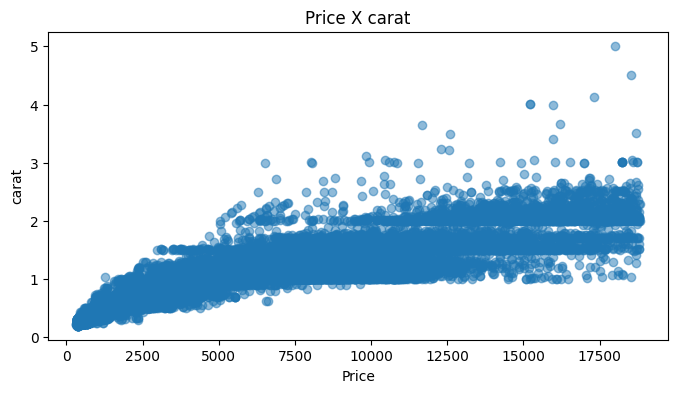

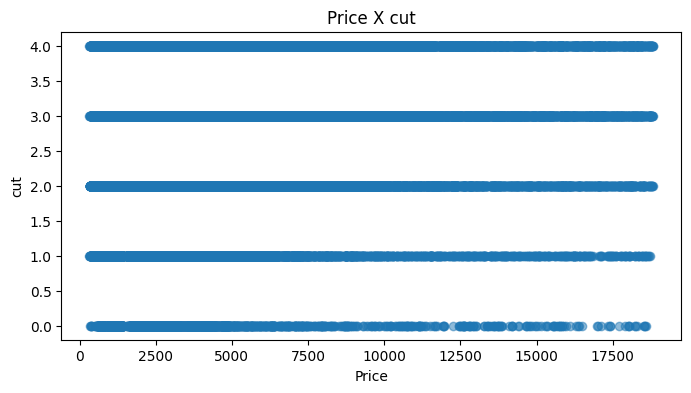

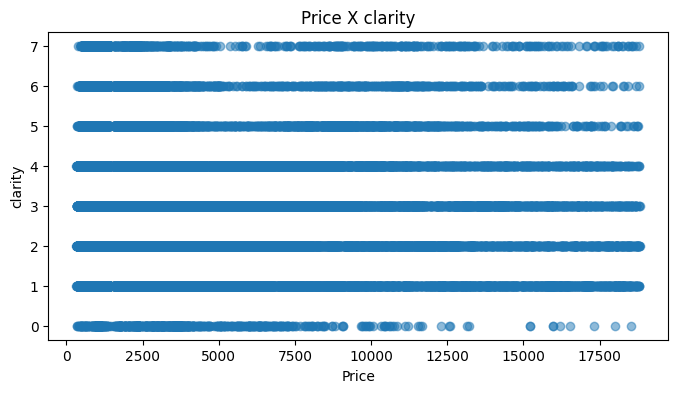

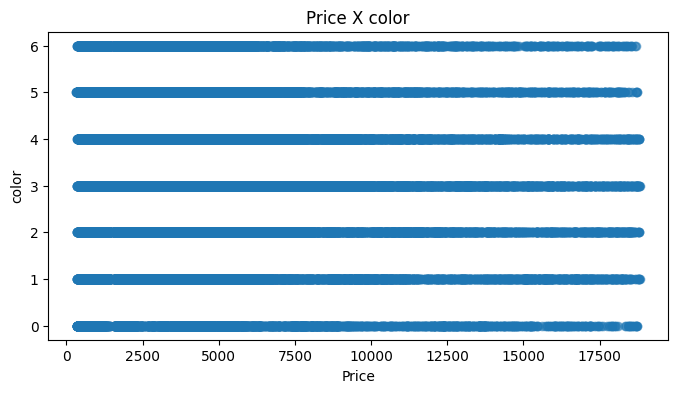

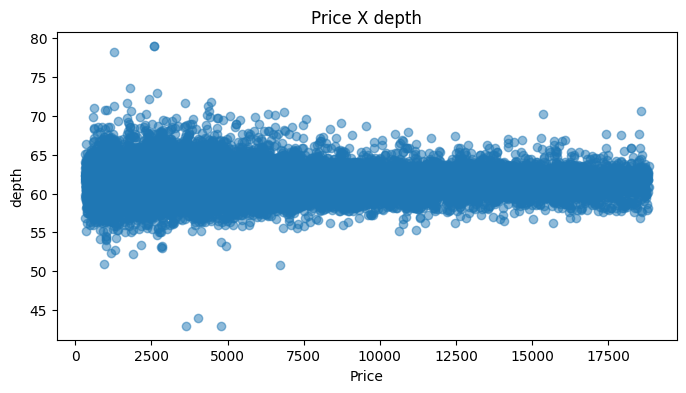

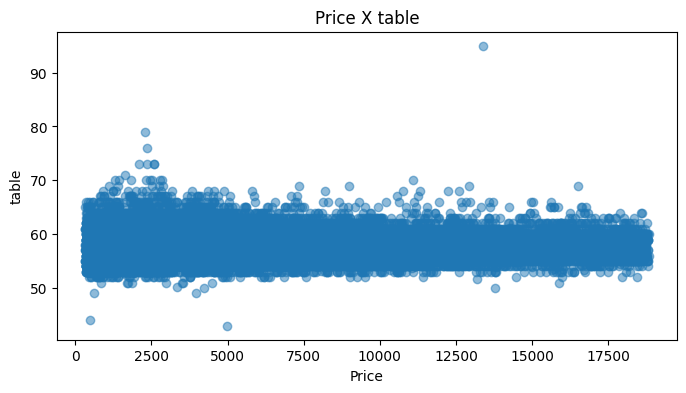

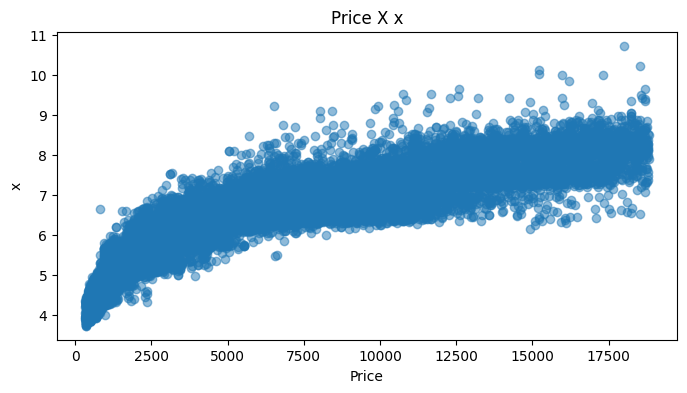

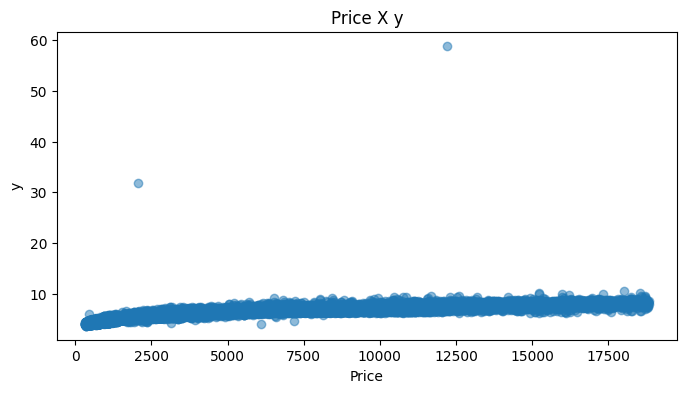

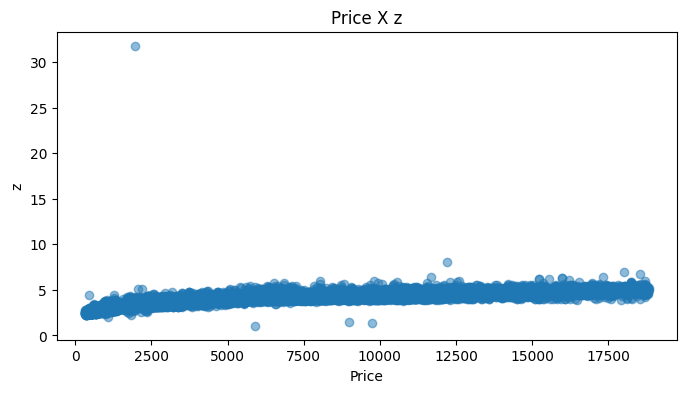

In [14]:
num_cols = ['carat', 'cut', 'clarity', 'color', 'depth', 'table', 'x', 'y', 'z']
for col in num_cols:
  plt.figure(figsize=(8,4))
  plt.scatter(df['price'], df[col], alpha=0.5)
  plt.xlabel('Price')
  plt.ylabel(col)
  plt.title(f'Price X {col}')
  plt.show()

In [15]:
df = df[(df['depth']<75) & (df['depth']>45)]
df = df[(df['table']<85) & (df['table']>40)]
df = df[(df['y']<30)]
df = df[(df['z']<30)]
df = df.reset_index(drop=True)
df.shape

(53910, 10)

In [16]:
corr_m = df.corr()
corr_m['price'].sort_values(ascending=False)

,price
price,1.000000
carat,0.921595
y,0.888814
x,0.887220
z,0.882166
table,0.127044
depth,-0.010312
cut,-0.053477
clarity,-0.146751
color,-0.172399


O coeficiente de correlacao está no intervalo de menos um a um (inclusos). Quando o coeficiente está proximo de -1, temos uma correlacao negativa, quando proximo de 1 uma corrrelacao positiva, e valores proximos de zero indicam a ausencia de uma correlacao linear.

In [17]:
carat_buckets = [0,0.5,1.0,2.0,3.0,float('inf')]
df['carat_cat']=pd.cut(df['carat'], bins=carat_buckets)
print(df['carat_cat'].value_counts())

df['carat_cat_enc'] = pd.Categorical(df['carat_cat']).codes
df=df.drop(columns=['carat_cat'])
df.head(100)

carat_cat
(0.0, 0.5]    18930
(0.5, 1.0]    17498
(1.0, 2.0]    15600
(2.0, 3.0]     1850
(3.0, inf]       32
Name: count, dtype: int64


,carat,cut,color,clarity,depth,table,price,x,y,z,carat_cat_enc
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,0
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,0
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.70,1,5,3,57.5,58.0,2759,5.85,5.90,3.38,1
96,0.70,1,4,4,59.4,62.0,2759,5.71,5.76,3.40,1
97,0.96,0,4,1,66.3,62.0,2759,6.27,5.95,4.07,1
98,0.73,2,5,2,61.6,59.0,2760,5.77,5.78,3.56,1


In [18]:
scaler=MinMaxScaler()
normalize_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
df[normalize_cols] = scaler.fit_transform(df[normalize_cols])

In [19]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["carat_cat_enc"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['carat_cat_enc'], random_state=42)

In [21]:
print("Training set strata distribution:")
print(X_train['carat_cat_enc'].value_counts().sort_index())
print("\nTest set strata distribution:")
print(X_test['carat_cat_enc'].value_counts().sort_index())

Training set strata distribution:
carat_cat_enc
0    15144
1    13998
2    12480
3     1480
4       26
Name: count, dtype: int64

Test set strata distribution:
carat_cat_enc
0    3786
1    3500
2    3120
3     370
4       6
Name: count, dtype: int64
